In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries loaded successfully!")

✅ All libraries loaded successfully!


In [14]:
# Load the dataset
df = pd.read_csv('Medicalpremium.csv')

print(df.shape)
df.head()

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check the shape (rows, columns)
print(f"\nDataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Check column names and data types
print("\nColumn names and data types:")
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


(1003, 11)
First 5 rows of the dataset:
   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0   

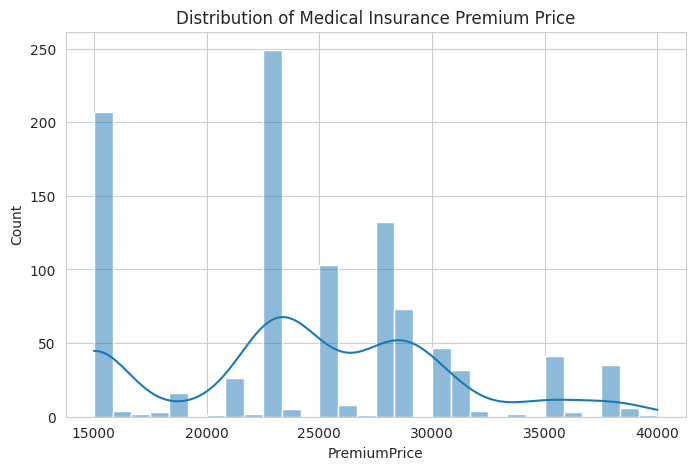

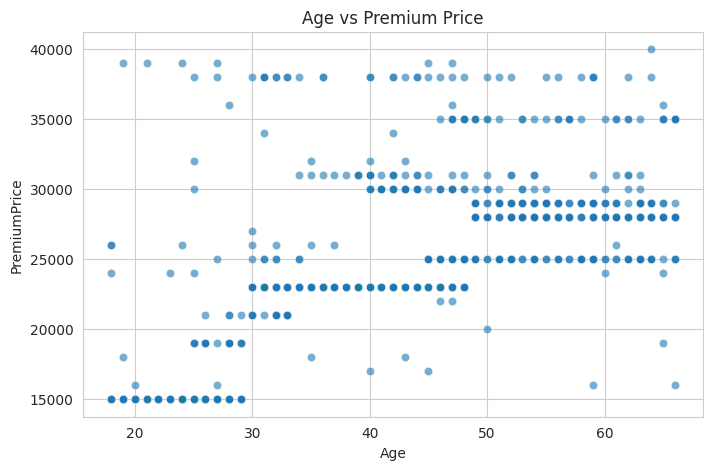

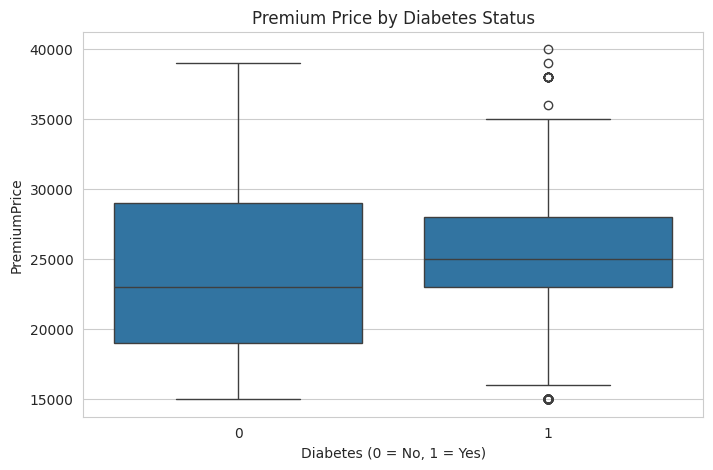

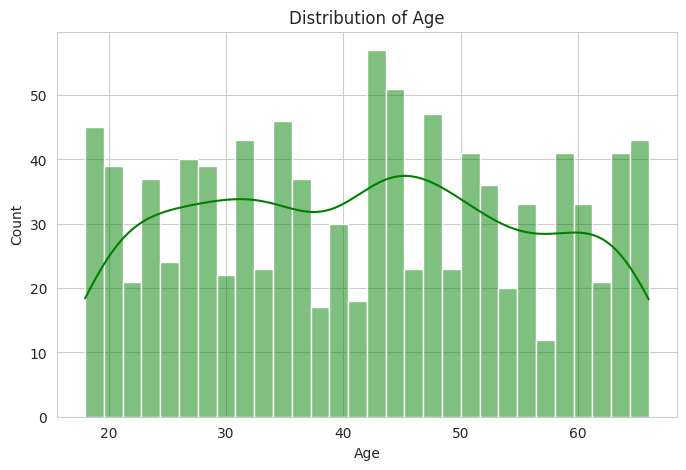

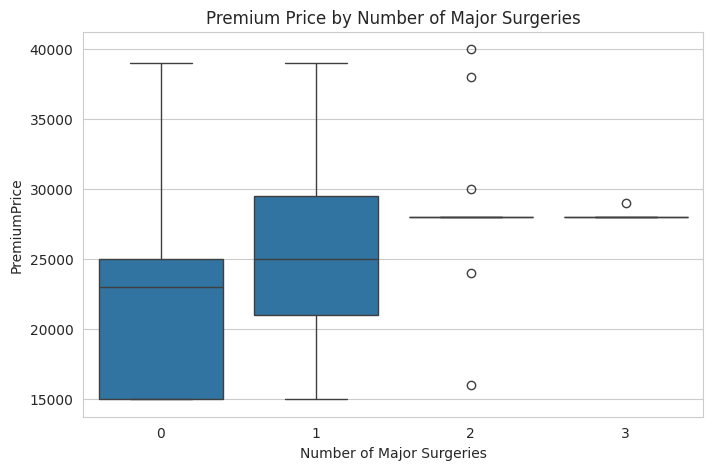

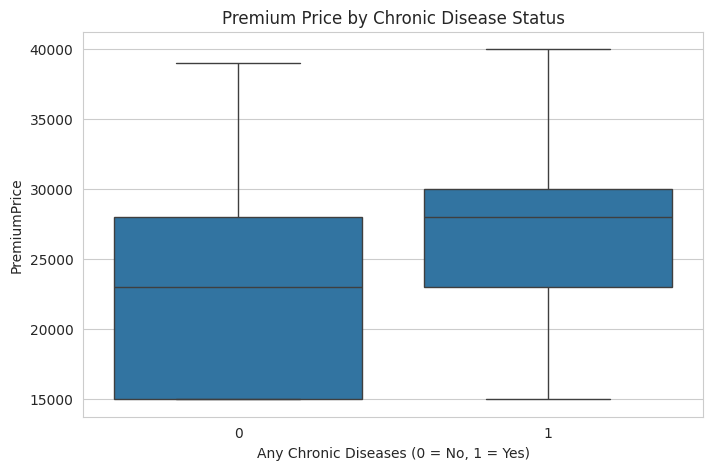

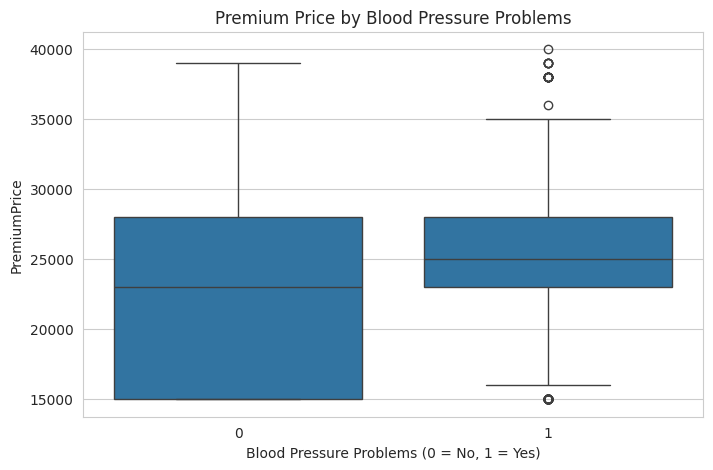

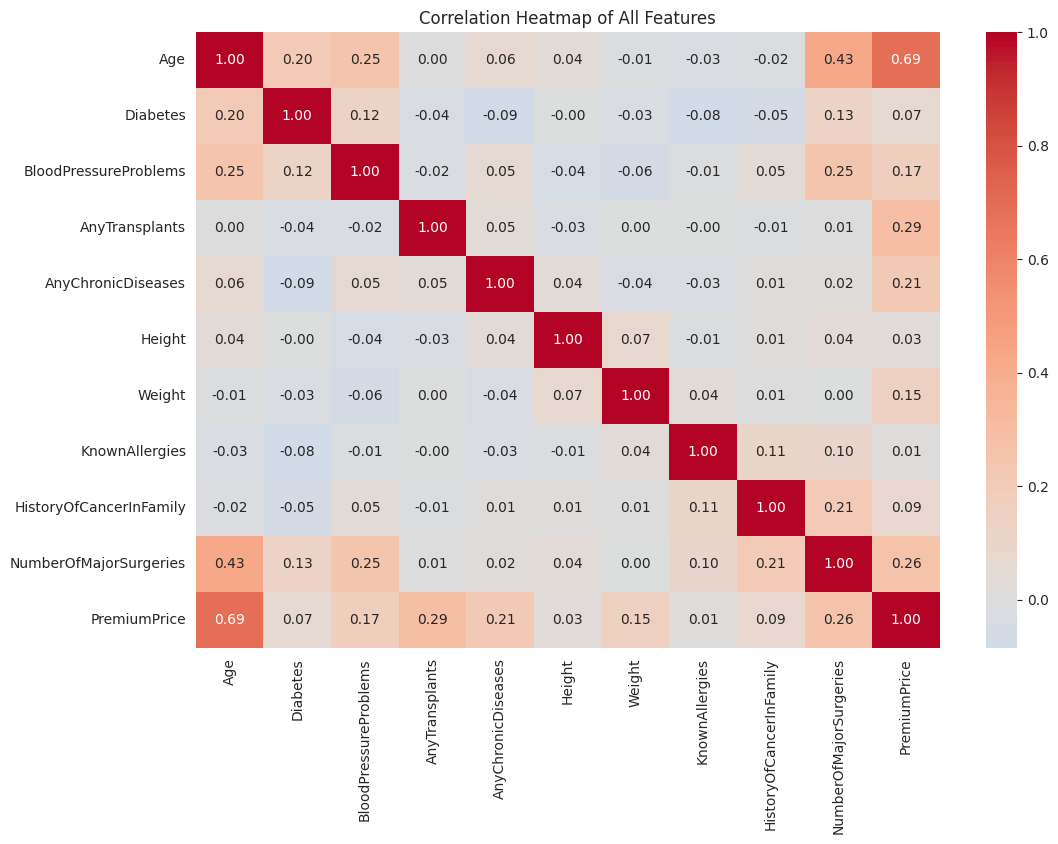

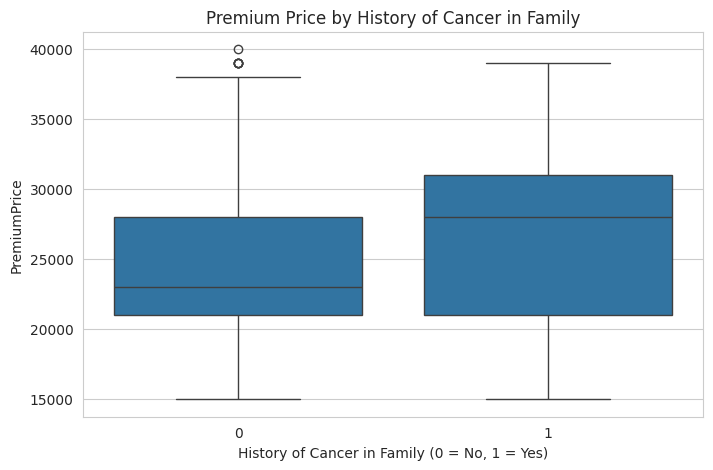

In [15]:
#EDA with key plots
# 1. Distribution of PremiumPrice
plt.figure(figsize=(8, 5))
sns.histplot(df['PremiumPrice'], kde=True, bins=30)
plt.title('Distribution of Medical Insurance Premium Price')
plt.xlabel('PremiumPrice')
plt.ylabel('Count')
plt.show()

# 2. Age vs PremiumPrice
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='PremiumPrice', data=df, alpha=0.6)
plt.title('Age vs Premium Price')
plt.xlabel('Age')
plt.ylabel('PremiumPrice')
plt.show()

# 3. Diabetes vs PremiumPrice (0 = no, 1 = yes)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diabetes', y='PremiumPrice', data=df)
plt.title('Premium Price by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('PremiumPrice')
plt.show()

# 4. Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 5. Number of Major Surgeries vs PremiumPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df)
plt.title('Premium Price by Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('PremiumPrice')
plt.show()

# 6. Chronic Diseases vs PremiumPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x='AnyChronicDiseases', y='PremiumPrice', data=df)
plt.title('Premium Price by Chronic Disease Status')
plt.xlabel('Any Chronic Diseases (0 = No, 1 = Yes)')
plt.ylabel('PremiumPrice')
plt.show()

# 7. Blood Pressure Problems vs PremiumPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x='BloodPressureProblems', y='PremiumPrice', data=df)
plt.title('Premium Price by Blood Pressure Problems')
plt.xlabel('Blood Pressure Problems (0 = No, 1 = Yes)')
plt.ylabel('PremiumPrice')
plt.show()

# 8. Correlation Heatmap (shows relationships between all numeric variables)
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of All Features')
plt.show()

# 9. History of Cancer in Family vs PremiumPrice
plt.figure(figsize=(8, 5))
sns.boxplot(x='HistoryOfCancerInFamily', y='PremiumPrice', data=df)
plt.title('Premium Price by History of Cancer in Family')
plt.xlabel('History of Cancer in Family (0 = No, 1 = Yes)')
plt.ylabel('PremiumPrice')
plt.show()

In [8]:
#preparing for regression modeling

from sklearn.model_selection import train_test_split

# 1. Features and target
X = df.drop('PremiumPrice', axis=1)   # all columns except PremiumPrice
y = df['PremiumPrice']                # target

# 2. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (802, 10)
X_test shape: (201, 10)
y_train shape: (802,)
y_test shape: (201,)


In [9]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Initialize and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 2. Predict on the test set
y_pred_lr = lin_reg.predict(X_test)

# 3. Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance on Test Set")
print(f"MAE : {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²  : {r2_lr:.3f}")

Linear Regression Performance on Test Set
MAE : 2923.46
RMSE: 4289.27
R²  : 0.625


In [10]:
#LINEAR REGRESSION
# Put coefficients into a table
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                   Feature  Coefficient
3           AnyTransplants  7015.578317
4       AnyChronicDiseases  2579.227843
8  HistoryOfCancerInFamily  2140.455592
7           KnownAllergies   326.097078
0                      Age   324.631502
6                   Weight    73.641672
2    BloodPressureProblems    37.544912
5                   Height    -4.380612
1                 Diabetes  -453.909187
9   NumberOfMajorSurgeries  -652.587543


In [11]:
#DECISION TREE
from sklearn.tree import DecisionTreeRegressor

# 1. Initialize Decision Tree (set random_state for reproducibility)
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=4)  # start with a shallow tree

# 2. Fit the model
dt_reg.fit(X_train, y_train)

# 3. Predict on test set
y_pred_dt = dt_reg.predict(X_test)

# 4. Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression Performance on Test Set")
print(f"MAE : {mae_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²  : {r2_dt:.3f}")

Decision Tree Regression Performance on Test Set
MAE : 2070.48
RMSE: 3625.07
R²  : 0.732


In [12]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

# Fit the model
rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Performance on Test Set")
print(f"MAE : {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²  : {r2_rf:.3f}")

Random Forest Regression Performance on Test Set
MAE : 1367.29
RMSE: 3257.23
R²  : 0.784


                   Feature  Importance
0                      Age    0.665815
6                   Weight    0.109705
3           AnyTransplants    0.080359
9   NumberOfMajorSurgeries    0.036200
5                   Height    0.035395
4       AnyChronicDiseases    0.030728
8  HistoryOfCancerInFamily    0.022461
2    BloodPressureProblems    0.007434
1                 Diabetes    0.006276
7           KnownAllergies    0.005627


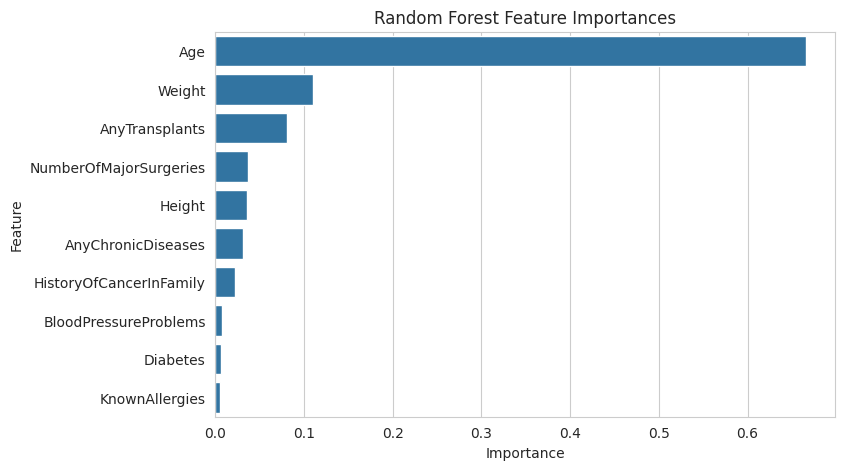

In [16]:
#Which factors influence the premium?”), we should look at feature importances from the Random Forest
# Feature importance from Random Forest
importances = rf_reg.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)
# Optionally, a bar plot:

# python
# Copy
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Random Forest Feature Importances')
plt.show()